In [2]:
#instalamos las librerias necesarias para el proyecto
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install numpy
print('Instaladas todas las librerias')

Instaladas todas las librerias


In [37]:
!pip install geopandas
print('Instalada')

Instalada


In [3]:
#importo todas las librerias para comenzar a trabajar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#cargo el data set
df = pd.read_csv('Housing prices statisticals.tsv', sep='\t')
print(df.head())

  freq,indic,unit,geo\TIME_PERIOD 2005-Q1  2005-Q2  2005-Q3  2005-Q4   \
0              Q,TOTAL,I15_NSA,AT       :        :        :        :    
1              Q,TOTAL,I15_NSA,BE   70.03    71.59    74.12    75.65    
2              Q,TOTAL,I15_NSA,BG  76.01 e  79.26 e  81.55 e  83.52 e   
3              Q,TOTAL,I15_NSA,CY   93.41    95.38    98.79   100.64    
4              Q,TOTAL,I15_NSA,CZ       :        :        :        :    

  2006-Q1  2006-Q2  2006-Q3  2006-Q4   2007-Q1   ... 2022-Q3  2022-Q4   \
0       :        :        :        :         :   ...  173.59   166.32    
1   77.10    79.18    81.54    82.16     84.05   ...  134.96   134.55    
2  87.47 e  88.91 e  92.96 e  98.09 e  107.23 e  ...  174.43   175.14    
3  103.04   106.44   110.64   114.16    116.41   ...  109.95   108.27    
4       :        :        :        :         :   ...  219.40   214.50    

  2023-Q1  2023-Q2  2023-Q3  2023-Q4  2024-Q1  2024-Q2  2024-Q3   2024-Q4   
0  164.35   164.68   164.29   161.40   

In [5]:
#obtengo un resumen consiso del data frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   freq,indic,unit,geo\TIME_PERIOD  104 non-null    object
 1   2005-Q1                          104 non-null    object
 2   2005-Q2                          104 non-null    object
 3   2005-Q3                          104 non-null    object
 4   2005-Q4                          104 non-null    object
 5   2006-Q1                          104 non-null    object
 6   2006-Q2                          104 non-null    object
 7   2006-Q3                          104 non-null    object
 8   2006-Q4                          104 non-null    object
 9   2007-Q1                          104 non-null    object
 10  2007-Q2                          104 non-null    object
 11  2007-Q3                          104 non-null    object
 12  2007-Q4                          104

In [9]:
#obtengo el tipo de datos que contiene el data frame
print(df.dtypes)

freq,indic,unit,geo\TIME_PERIOD    object
2005-Q1                            object
2005-Q2                            object
2005-Q3                            object
2005-Q4                            object
                                    ...  
2023-Q4                            object
2024-Q1                            object
2024-Q2                            object
2024-Q3                            object
2024-Q4                            object
Length: 81, dtype: object


In [10]:
#obtengo una descripcion de todo lo que contiene el data frame
print(df.describe())

       freq,indic,unit,geo\TIME_PERIOD 2005-Q1  2005-Q2  2005-Q3  2005-Q4   \
count                              104      104      104      104      104   
unique                             104       20       35       36       38   
top                 Q,TOTAL,I15_NSA,AT       :        :        :        :    
freq                                 1       85       66       66       65   

       2006-Q1  2006-Q2  2006-Q3  2006-Q4  2007-Q1   ... 2022-Q3  2022-Q4   \
count       104      104      104      104      104  ...      104      104   
unique       60       63       63       63       71  ...       84       84   
top          :        :        :        :        :   ...     0.8     -1.5    
freq         42       39       39       38       32  ...        4        4   

       2023-Q1  2023-Q2  2023-Q3  2023-Q4  2024-Q1  2024-Q2  2024-Q3  2024-Q4   
count       104      104      104      104      104      104      104      104  
unique       89       90       88       88       90     

In [12]:
#Dado que los nombres de las columnas son abreviados los renombro
df[['Frecuency', 'Indicator','Unit','Geo']] = df[r'freq,indic,unit,geo\TIME_PERIOD'].str.split(',', expand = True)

In [13]:
#ahora procedo a eliminar la columna original
df.drop(columns = [r'freq,indic,unit,geo\TIME_PERIOD'], inplace = True)

In [14]:
#reorganizo el data set para el analisis temporal
df_melted = df.melt(id_vars=['Geo'], var_name = 'Time', value_name = 'Price')

In [15]:
#limpio la columna 'Tiempo' para poder utilizarla
df_melted['Time'] = df_melted['Time'].str.extract(r'(\d{4}-Q\d)')
df_melted.dropna(subset=['Time'], inplace = True)
df_melted['Year'] = df_melted['Time'].str[:4].astype(int)

In [16]:
#Dado que los precios estan en tipo objeto los convierto a un formato numerico
df_melted['Price'] = pd.to_numeric(df_melted['Price'], errors = 'coerce')

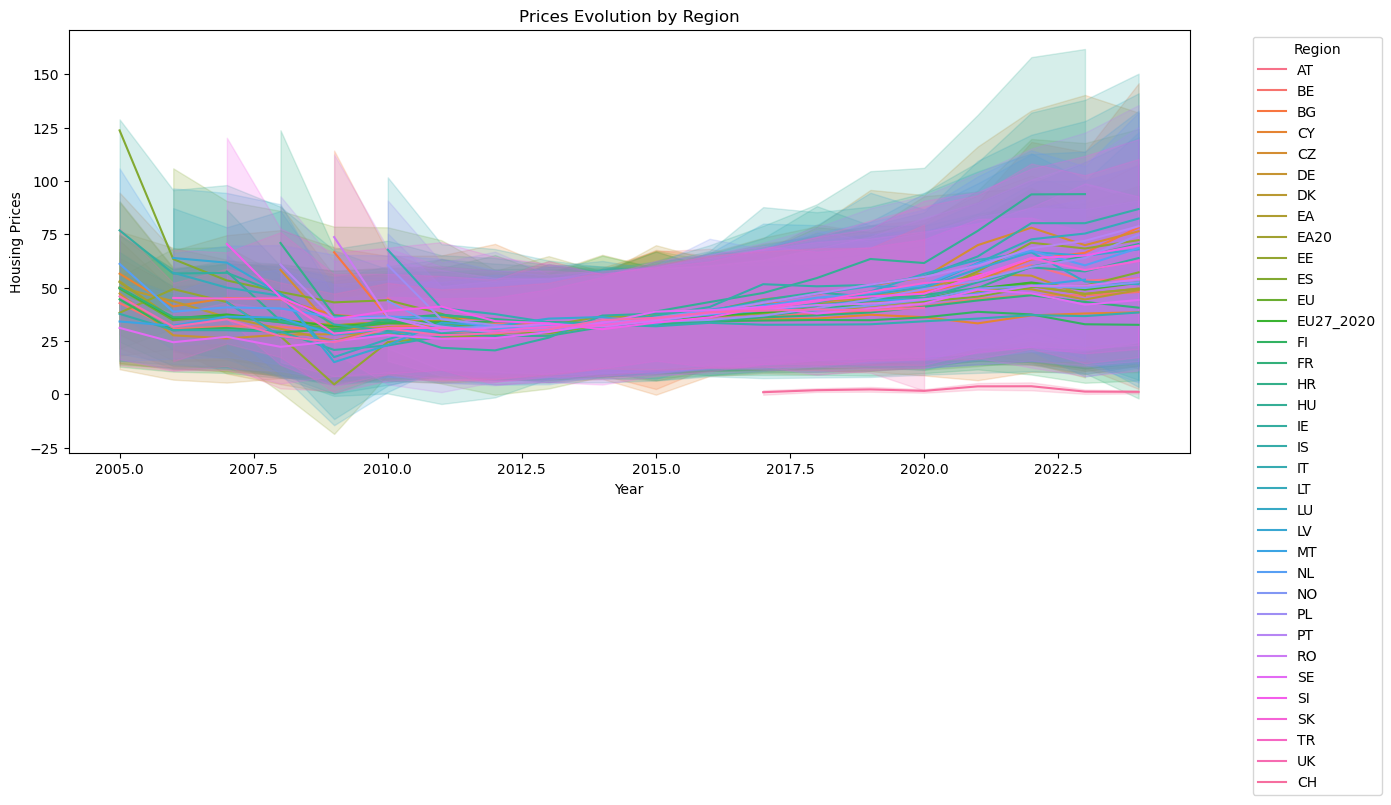

In [18]:
#terminado todo este proceso, muestro los graficos por region
plt.figure(figsize=(14,7))
sns.lineplot(x='Year', y='Price', hue='Geo', data=df_melted)
plt.xlabel('Year')
plt.ylabel('Housing Prices')
plt.title('Prices Evolution by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.savefig('Prices Evolution by Region.png')
plt.show()

In [19]:
#como el grafico resulta ser confuso por la cantidad de paises
#pasamos a estandarizar las unidades de medicion y tomar los datos de los
#paises mas representativos con I15_NSA

df_idx = df[df['Unit'] == 'I15_NSA']
df_melted = df_idx.melt(id_vars=['Geo'], var_name = 'Time', value_name = 'Index')
df_melted['Time'] = df_melted['Time'].str.extract(r'(\d{4}-Q\d)')
df_melted.dropna(inplace = True)
df_melted['Year'] = df_melted['Time'].str[:4].astype(int)
df_melted['Index'] = pd.to_numeric(df_melted['Index'], errors = 'coerce')

In [26]:
#tomo los paises mas representativos
top_geos = (
    df_melted.groupby('Geo')['Index']
    .mean()
    .sort_values(ascending=False)
    .head(11)
    .index
)
df_top = df_melted[df_melted['Geo'].isin(top_geos)]

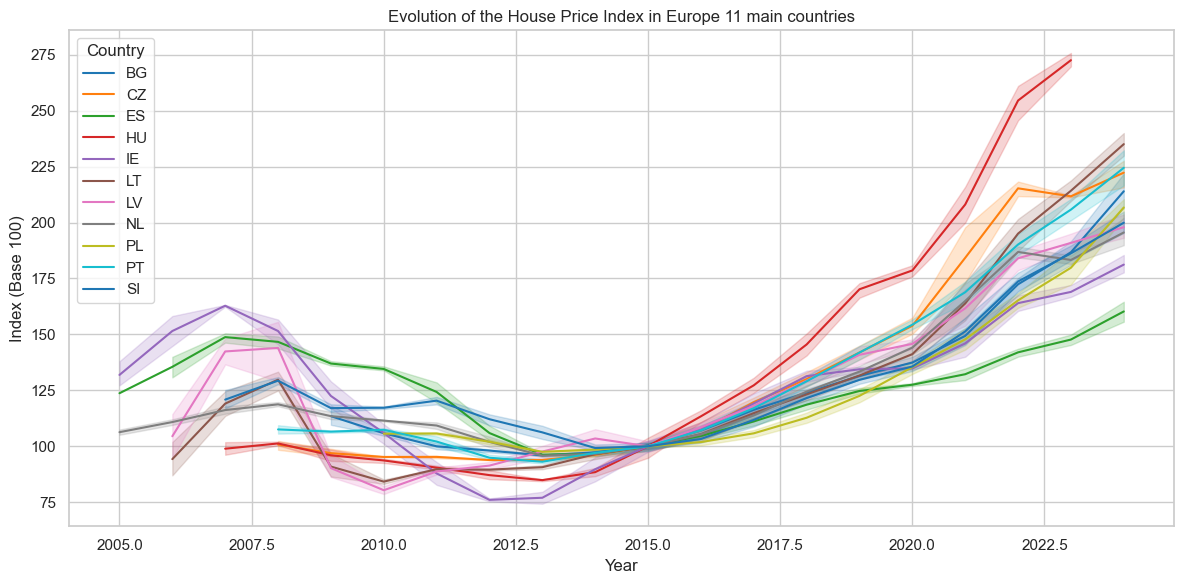

In [28]:
#procedo nuevamente a graficar
sns.set(style = 'whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df_top, x='Year', y='Index', hue="Geo", palette = 'tab10')

plt.title('Evolution of the House Price Index in Europe 11 main countries')
plt.xlabel('Year')
plt.ylabel('Index (Base 100)')
plt.legend(title='Country', loc = 'upper left')
plt.tight_layout()
plt.savefig('Evolution of the House Price Index in Europe 11 main countries')
plt.show()

In [31]:
#Para evitar confusiones por las siglas de los nombres de paises creo un diccionario
nombres_paises = {
    'AT':'Austria',
    'BE':'Bélgica',
    'CH':'Suiza',
    'DE':'Alemania',
    'DK':'Dinamarca',
    'ES':'España',
    'FI':'Finlandia',
    'FR':'Francia',
    'LU':'Luxemburgo',
    'NL':'Paises Bajos'
}

#Hago la lista de codigos a usar
paises_iso = list(nombres_paises.keys())

#Filtro y creo las etiquetas
df_top = df_melted[df_melted['Geo'].isin(paises_iso)].copy()
df_top['Geo_label'] = df_top['Geo'].map(lambda x:f'{x} - {nombres_paises[x]}')

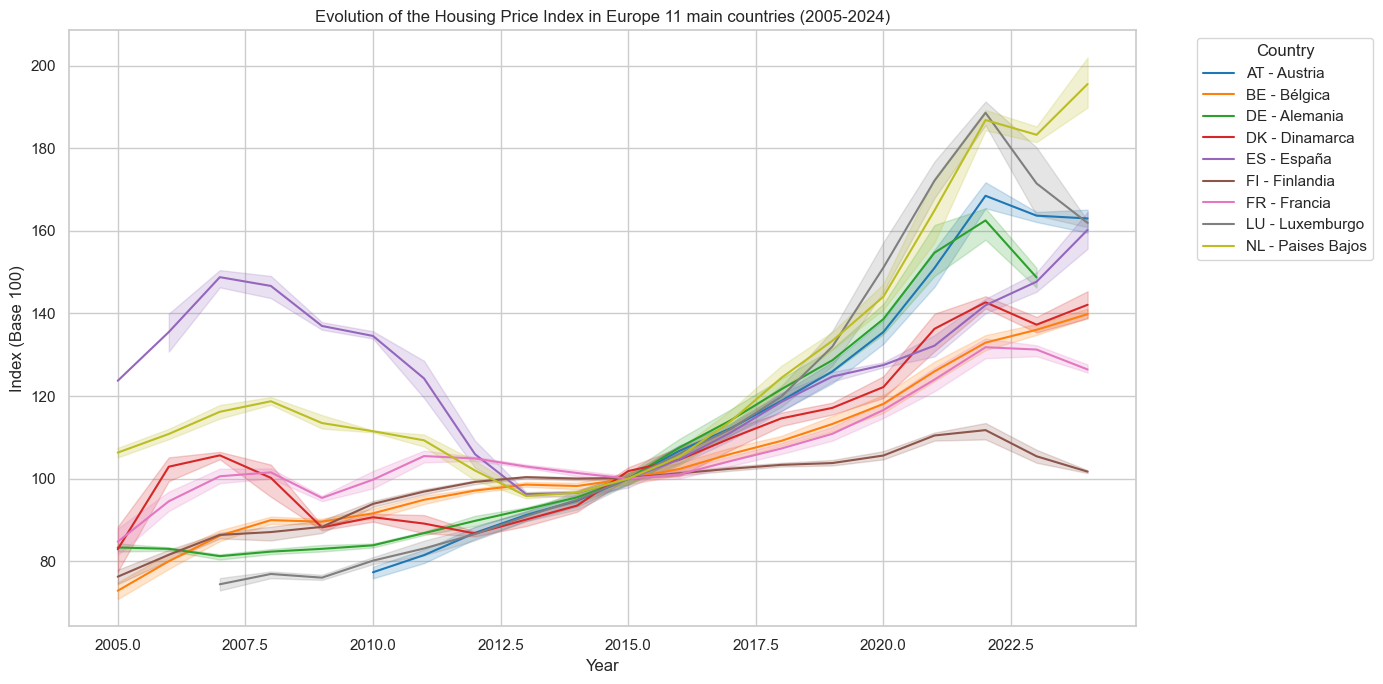

In [33]:
#Ahora nuevamente grafico con las etiquetas legibles
sns.set(style='whitegrid')
plt.figure(figsize=(14,7))

sns.lineplot(
    data=df_top,
    x='Year',
    y='Index',
    hue='Geo_label',
    palette='tab10'
)
plt.title('Evolution of the Housing Price Index in Europe 11 main countries (2005-2024)')
plt.xlabel('Year')
plt.ylabel('Index (Base 100)')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.savefig('Evolution of the Housing Price Index in Europe 11 main countries (2005-2024).png')
plt.show()

In [34]:
#ahora agrupamos par calcular el crecimiento de los paises
df_clean = df_top.dropna(subset=['Index']).copy()
df_clean = df_clean.sort_values(['Geo_label','Year'])

df_summary = df_clean.groupby('Geo_label').agg(
    inicio=('Index', lambda x: x.iloc[0]),
    final=('Index', lambda x: x.iloc[-1])
).dropna()

df_summary['Crecimiento %'] = ((df_summary['final'] - df_summary['inicio']) / df_summary['inicio']) * 100
df_summary = df_summary.sort_values('Crecimiento %', ascending = False)

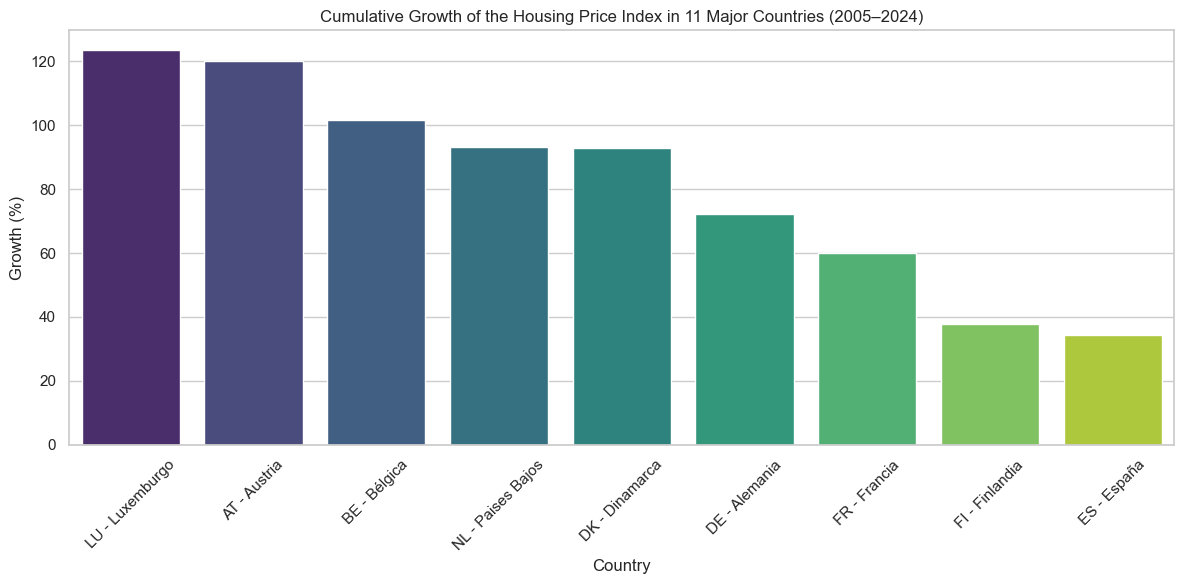

In [36]:
#Genero el grafico de barras para ver el crecimiento por pais
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_summary.reset_index(),
    x='Geo_label',
    y='Crecimiento %',
    hue='Geo_label',
    palette = 'viridis',
    legend = False
)
plt.title("Cumulative Growth of the Housing Price Index in 11 Major Countries (2005–2024)")
plt.xlabel('Country')
plt.ylabel('Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Cumulative Growth of the Housing Price Index in 11 Major Countries (2005–2024).png")
plt.show()

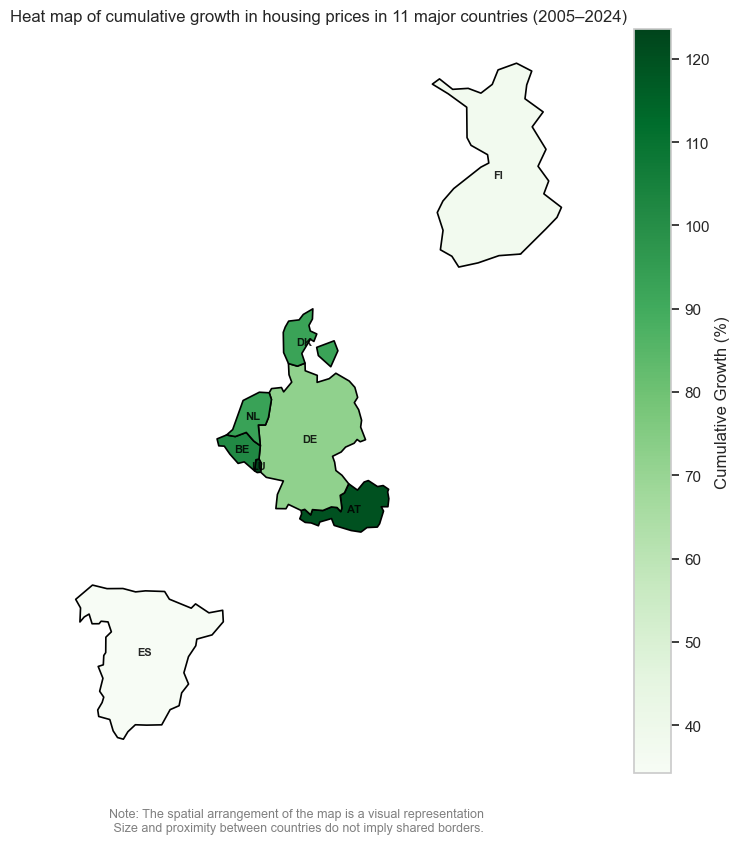

In [45]:
#para cerrar generamos un mapa de calor en referencia al crecimiento del precio
#de la vivienda por pais
#Importamos la libreria geopandas
import geopandas as gpd

#Cargo el archivo shapefile previamente descargado
ruta_mapa = r'C:\Users\dionn\Desktop\PYTHON\PROYECTOS\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'
world = gpd.read_file(ruta_mapa)

#filtro Europa y paises relevantes
paises_objetivo = df_summary.reset_index()

#Extraigo los codigos ISO
paises_objetivo['iso_a2'] = paises_objetivo['Geo_label'].str[:2]

europe = world[world['CONTINENT'] == 'Europe']
europe = europe[europe['ISO_A2'].isin(paises_objetivo['iso_a2'])]

#Uno los datos del indice al mapa
europe = europe.merge(paises_objetivo, left_on='ISO_A2', right_on='iso_a2', how='left')

europe.plot(
    column = 'Crecimiento %',
    cmap='Greens',
    linewidth = 1.2,
    edgecolor = 'black',
    legend = True,
    legend_kwds = {'label':'Cumulative Growth (%)', 'orientation':'vertical'},
    figsize=(10,8)
)

# Identifico cada mapa con el nombre del pais que representa

for idx, row in europe.iterrows():
    if row["geometry"].centroid.is_empty:
        continue
    x, y = row["geometry"].centroid.coords[0]
    label = row["ISO_A2"]
    plt.text(
        x, y,
        label,
        fontsize=8,
        ha="center",
        va="center",
        color="black",
        weight="bold",
        alpha=0.85
    )

#Para evitar confusiones añado una nota a pie de grafico

plt.figtext(
    0.5, -0.05,
    "Note: The spatial arrangement of the map is a visual representation\n Size and proximity between countries do not imply shared borders.",
    ha='center',
    fontsize = 9,
    color = 'gray'
)

plt.title('Heat map of cumulative growth in housing prices in 11 major countries (2005–2024)')
plt.axis('off')
plt.tight_layout()
plt.savefig('Heat map of cumulative growth in housing prices in 11 major countries (2005–2024).png')
plt.show()